In [1]:
#%reload_ext autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os, glob, subprocess
import numpy as np
import pandas as pd
import SimpleITK as sitk

import matplotlib.pyplot as plt

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['axes.grid'] = True
plt.gray()

titlesize = 22
labelsize = 20
linewidth = 4

In [2]:
dataRootDir = 'data/fromMonte/Validation_Study_Export27July2015'
outDir = os.path.join(dataRootDir, 'decoded')

In [36]:
bmodeFileList = glob.glob(os.path.join(dataRootDir, '*.raw.bmode'))

for i in range(len(bmodeFileList)):
    
    fpath = bmodeFileList[i]
    fdir = os.path.dirname(fpath)
    fname = os.path.basename(fpath)
    fname_wout_ext = os.path.splitext(fname)[0]

    raw_bmode_file = fpath
    raw_physio_file = os.path.join(fdir, fname_wout_ext + '.physio')
    raw_xml_file = os.path.join(fdir, fname_wout_ext + '.xml')
    
    out_bmode_vol_file = os.path.join(outDir, fname_wout_ext + '.bmode.mha')
    out_bmode_csv_file = os.path.join(outDir, fname_wout_ext + '.bmode.csv')
    out_physio_csv_file = os.path.join(outDir, fname_wout_ext + '.physio.csv')

    print 'Processing file %s ...' % fname
    
    subprocess.call(["DecodeVevo2100Files",
                     raw_bmode_file, raw_physio_file, raw_xml_file, 
                     out_bmode_vol_file, out_bmode_csv_file, out_physio_csv_file])

Processing file 2015-07-27-10-36-06_2015-07-15-16-56-36_1.raw.bmode ...
Processing file 2015-07-27-10-36-06_2015-07-15-16-56-46_1.raw.bmode ...
Processing file 2015-07-27-10-36-06_2015-07-15-16-57-35_1.raw.bmode ...
Processing file 2015-07-27-10-36-06_2015-07-15-16-57-51_1.raw.bmode ...
Processing file 2015-07-27-10-36-06_2015-07-15-16-56-16_1.raw.bmode ...
Processing file 2015-07-27-10-36-06_2015-07-15-16-56-27_1.raw.bmode ...


	Image Size:  (1009, 752, 300) 	Spacing:  [ 0.0119722   0.0119681   4.28992987]
	Image Size:  (1009, 752, 300) 	Spacing:  [ 0.0119722   0.0119681   4.28993988]
	Image Size:  (1009, 752, 300) 	Spacing:  [ 0.0119722   0.0119681   4.28992987]
	Image Size:  (1009, 752, 300) 	Spacing:  [ 0.0119722   0.0119681   4.28993988]
	Image Size:  (1009, 752, 300) 	Spacing:  [ 0.0119722   0.0119681   4.28992987]
	Image Size:  (1009, 752, 300) 	Spacing:  [ 0.0119722   0.0119681   4.28992987]


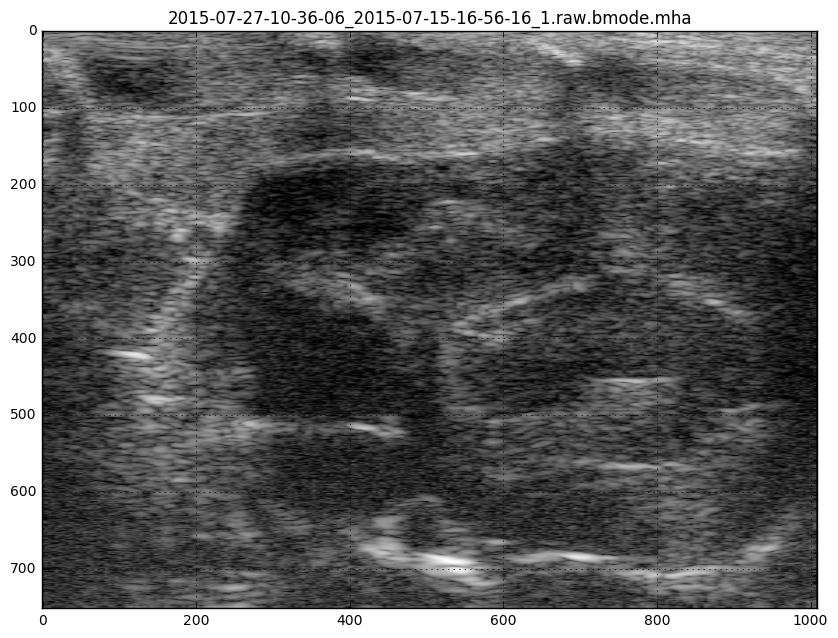

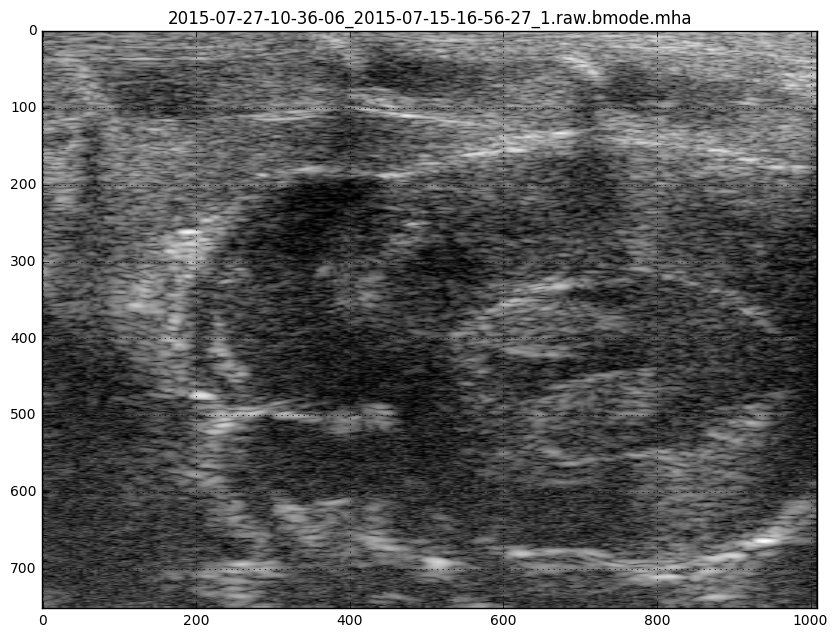

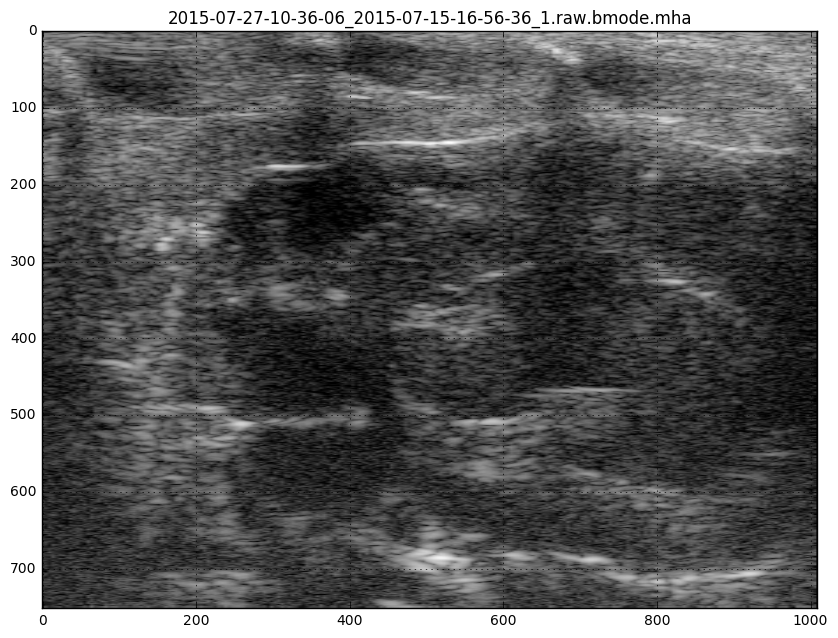

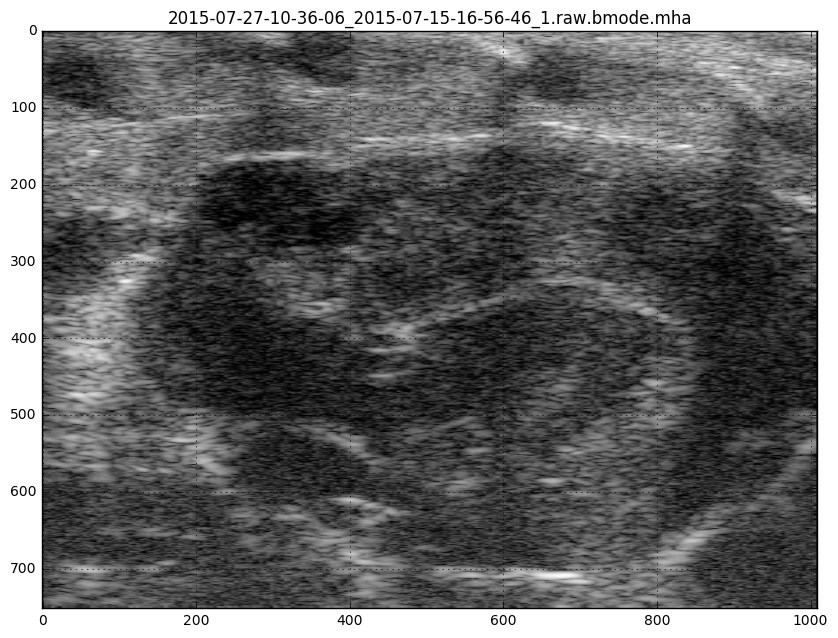

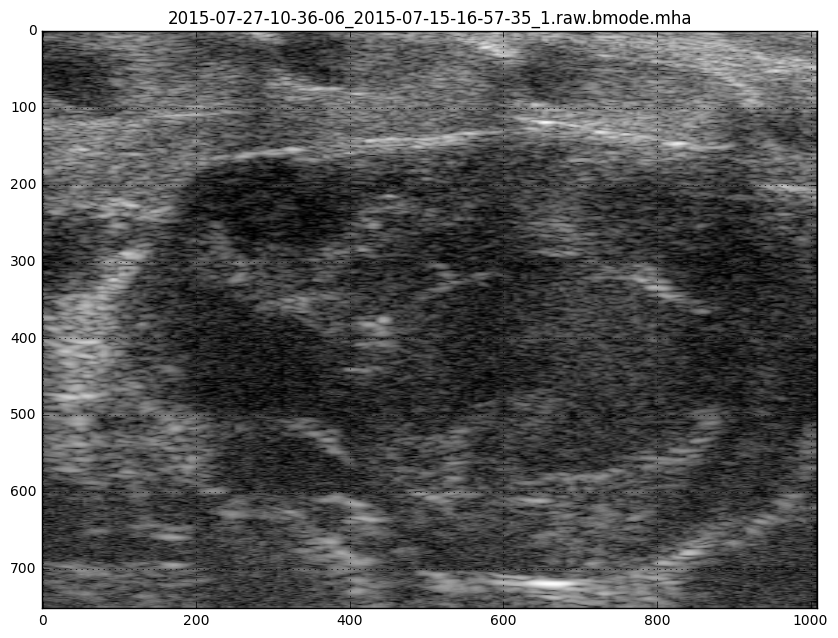

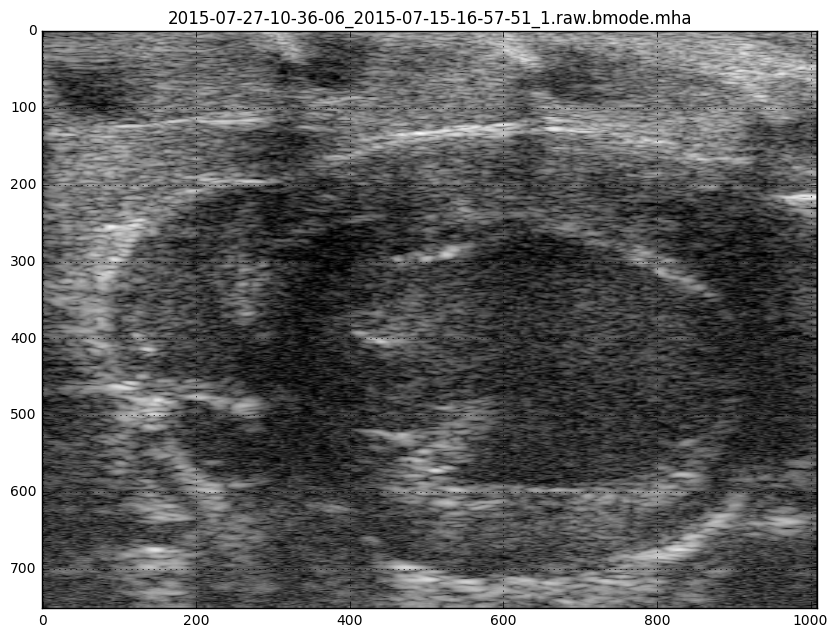

In [4]:
for fpath in glob.glob(os.path.join(outDir, '*.bmode.mha')):
    
    imInput_sitk = sitk.ReadImage(fpath)

    print '\tImage Size: ', imInput_sitk.GetSize(),   
    print '\tSpacing: ', np.array(imInput_sitk.GetSpacing())

    imInput = np.transpose(sitk.GetArrayFromImage(imInput_sitk), [1, 2, 0])      

    plt.figure()
    plt.imshow(imInput[:, :, 0])
    plt.title(os.path.basename(fpath))

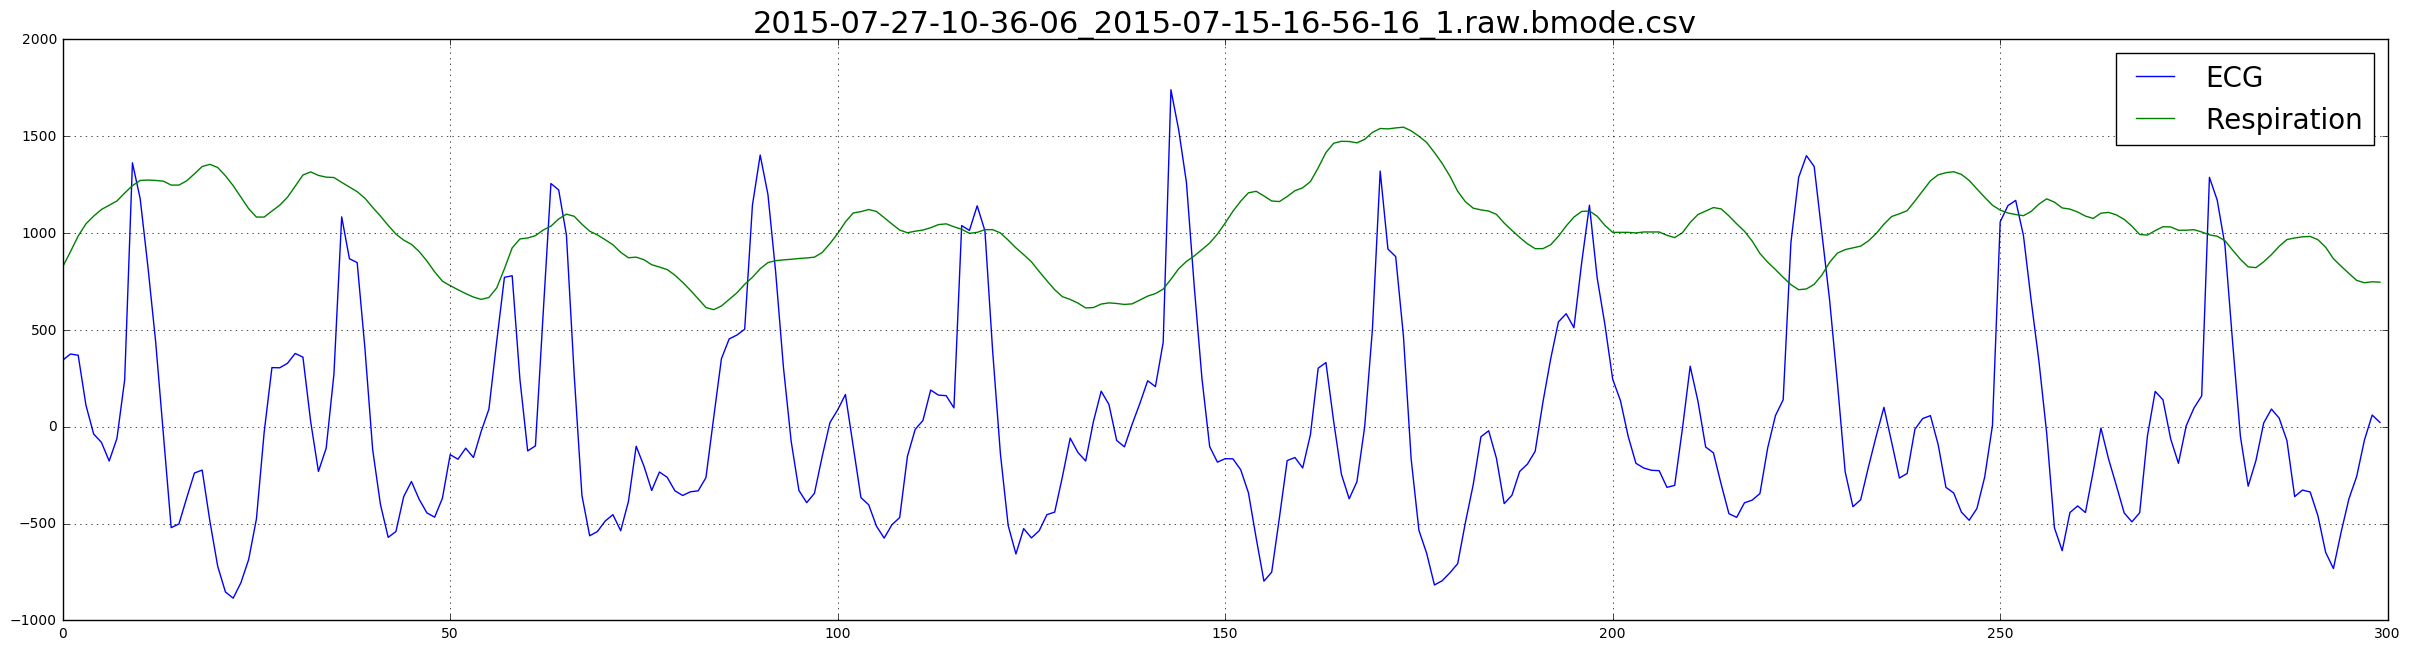

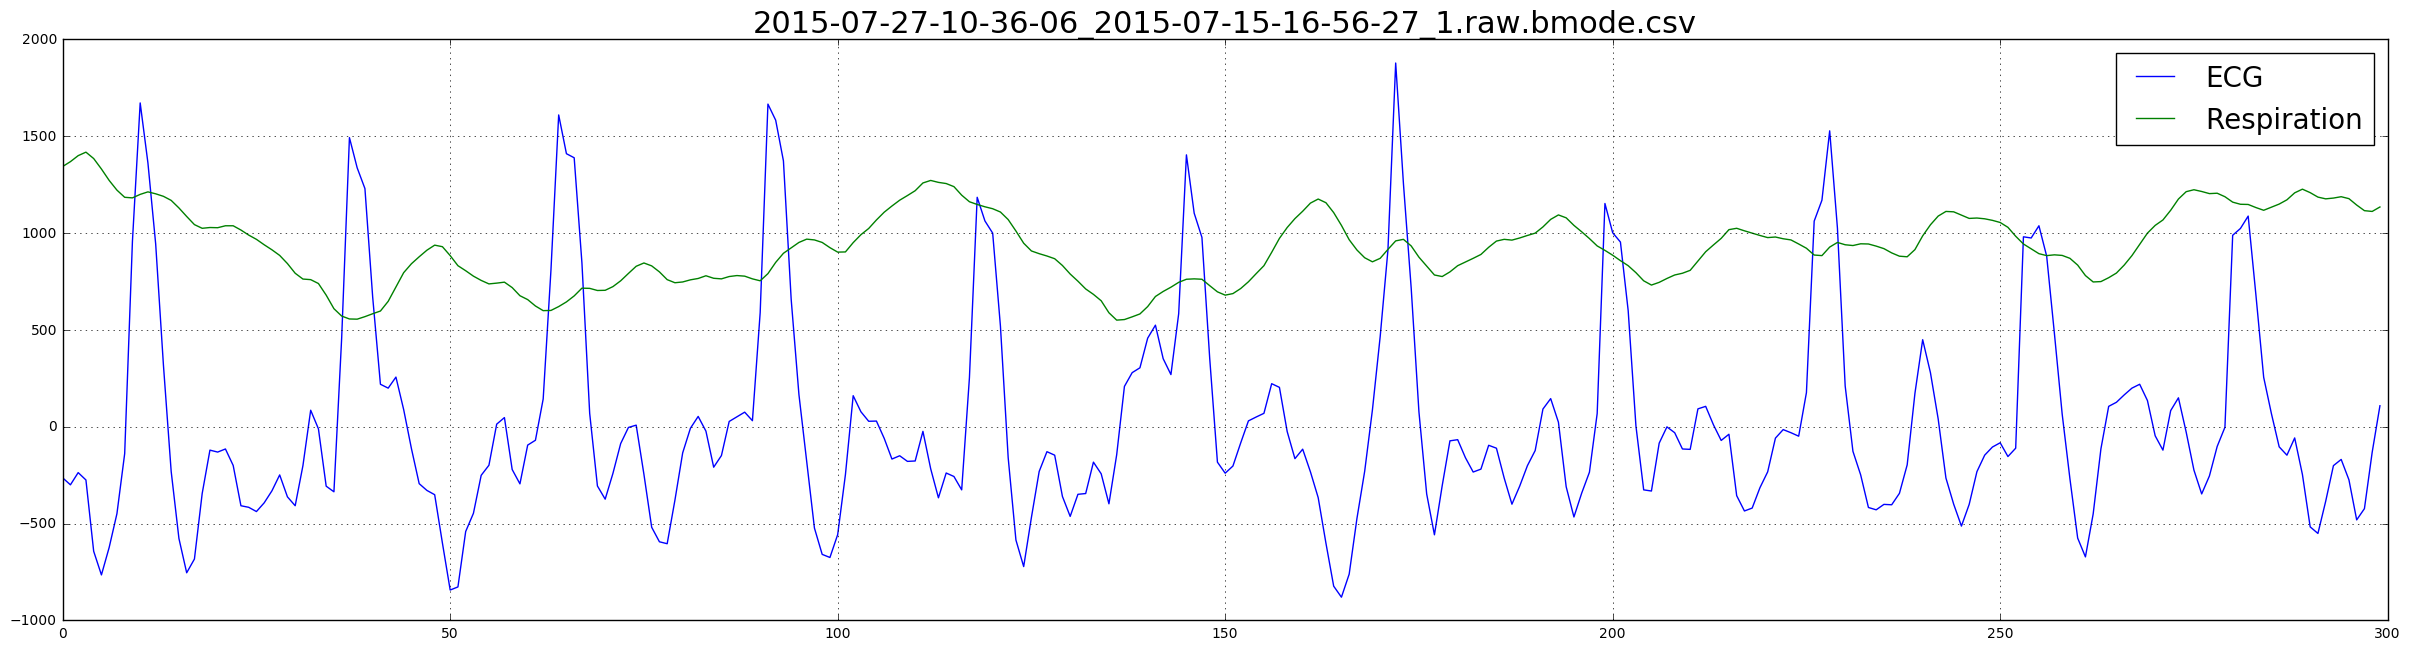

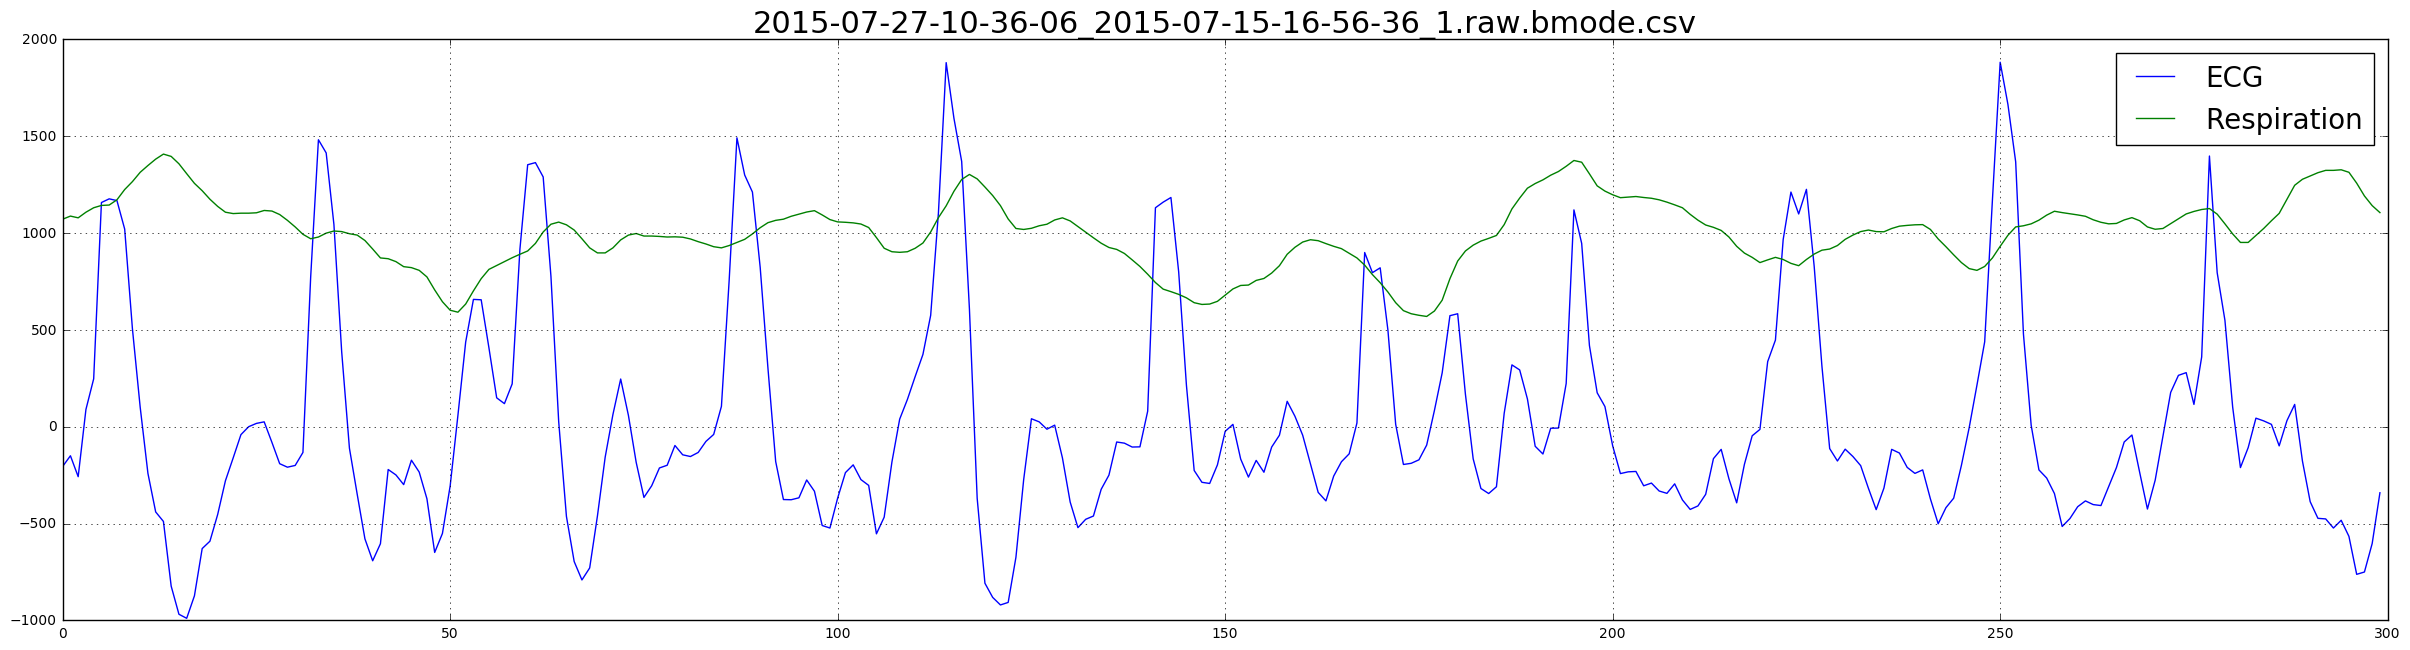

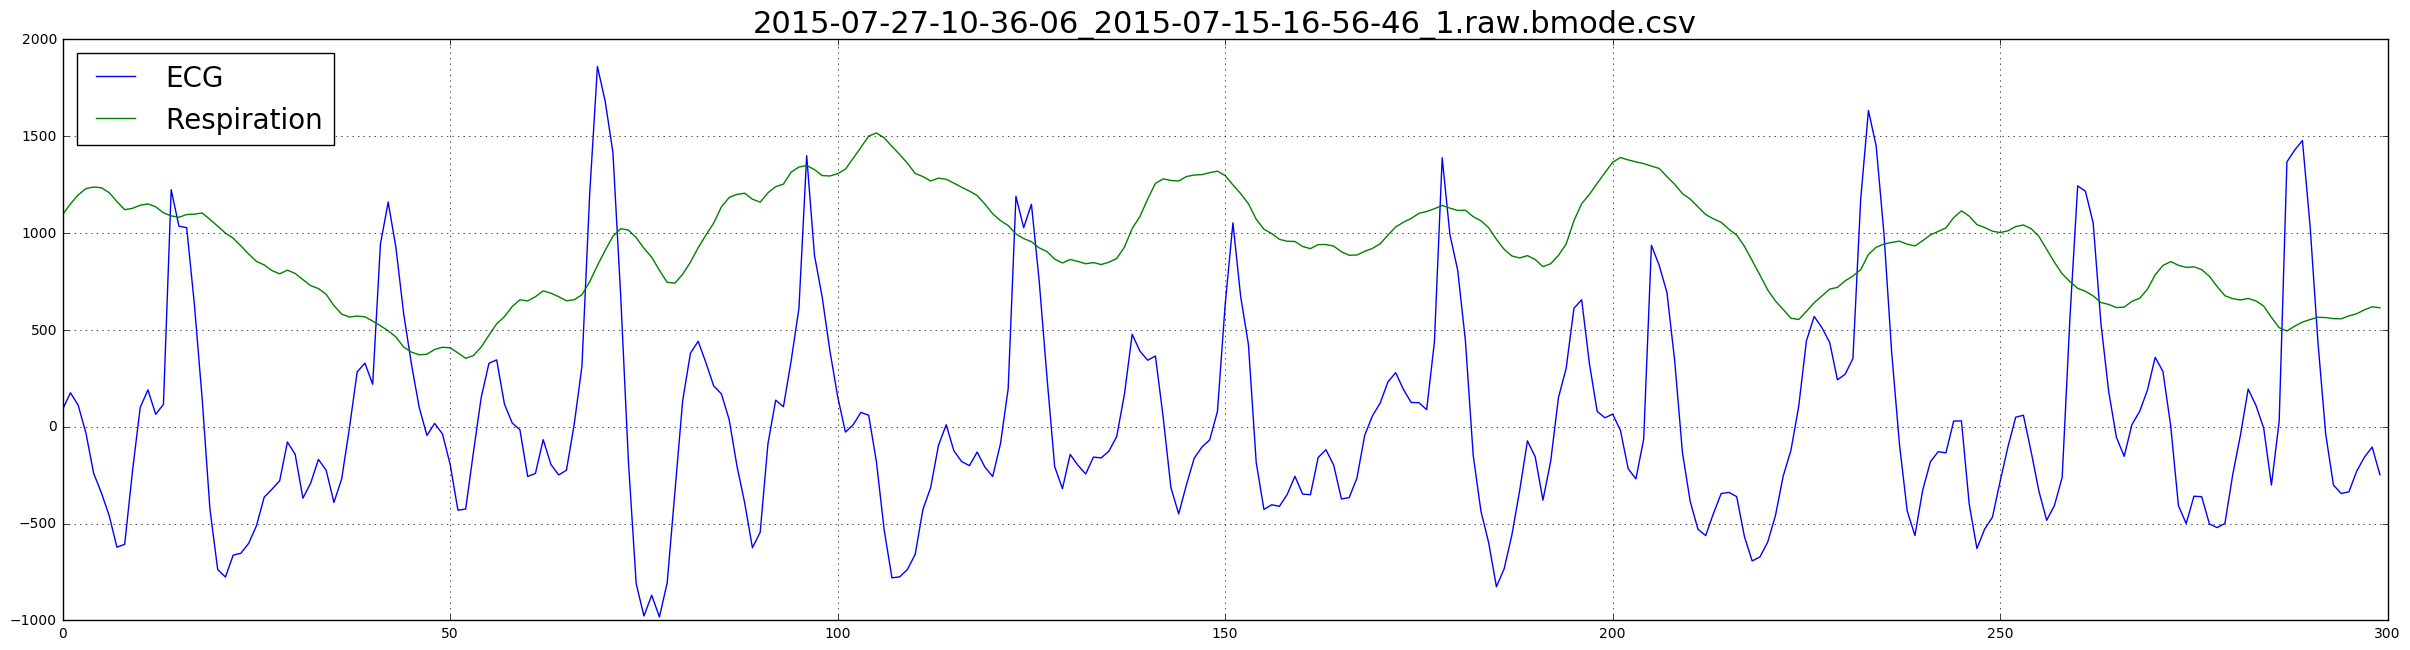

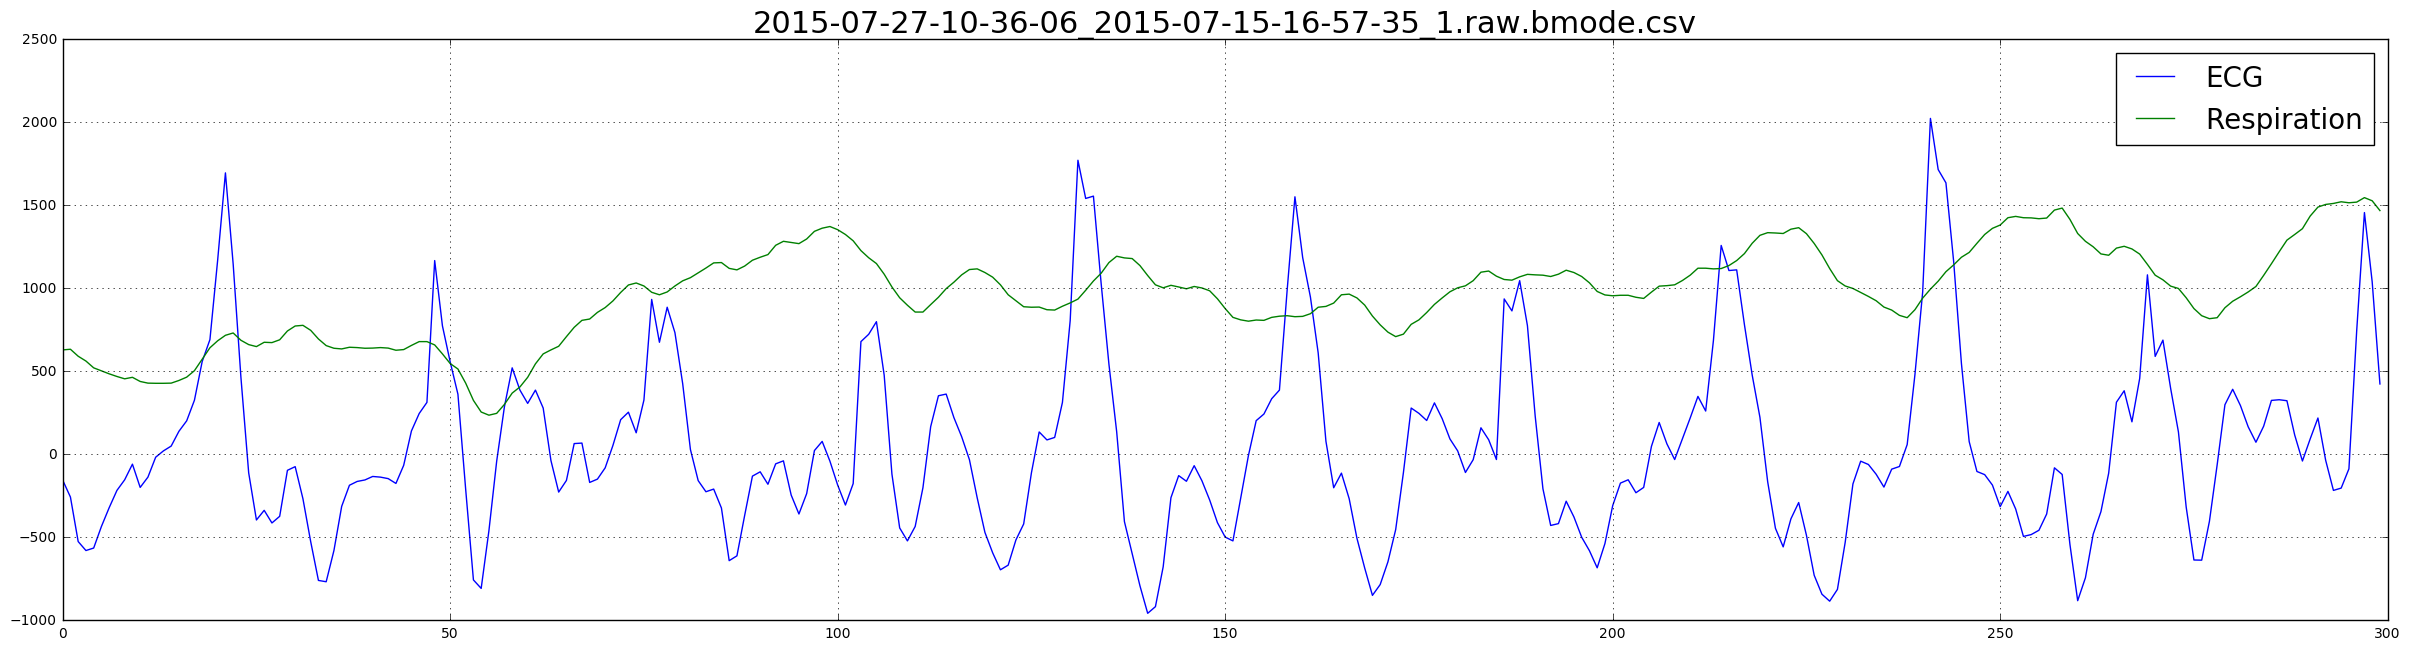

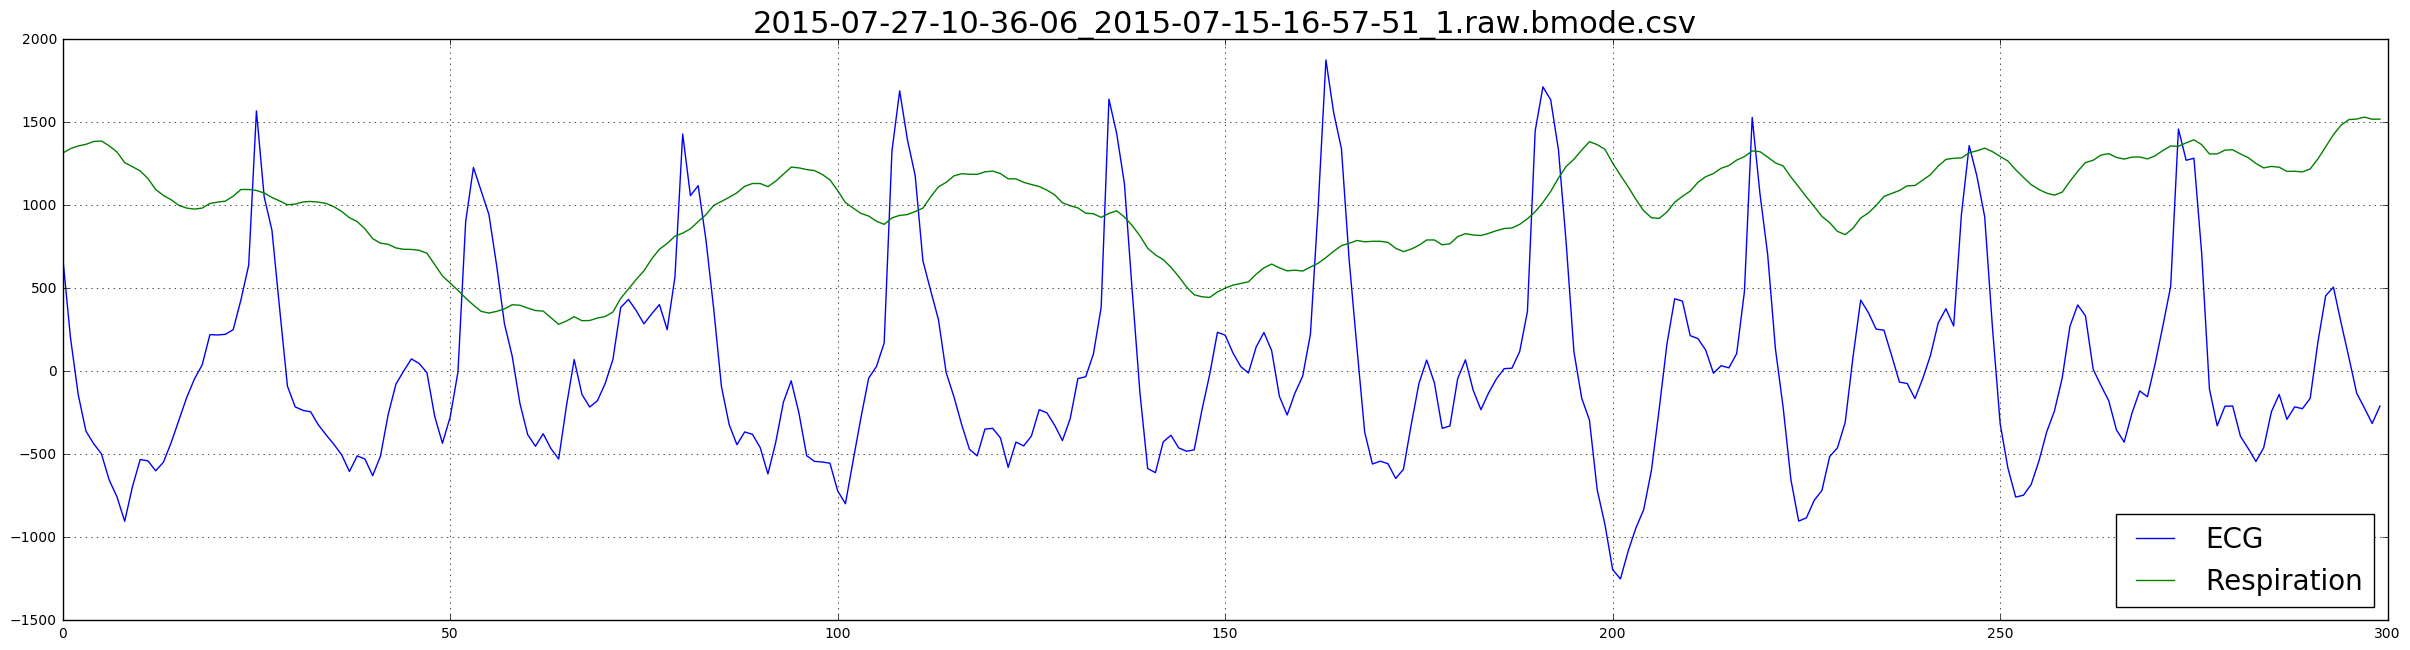

In [22]:
for fpath in glob.glob(os.path.join(outDir, '*.bmode.csv')):

    df = pd.read_csv(fpath, skipinitialspace=True)
    
    plt.figure()
    plt.plot(df.ECG, label='ECG')
    plt.plot(df.Respiration, label='Respiration')
    plt.title(os.path.basename(fpath), fontsize=titlesize)
    plt.legend(fontsize=labelsize, loc='best')

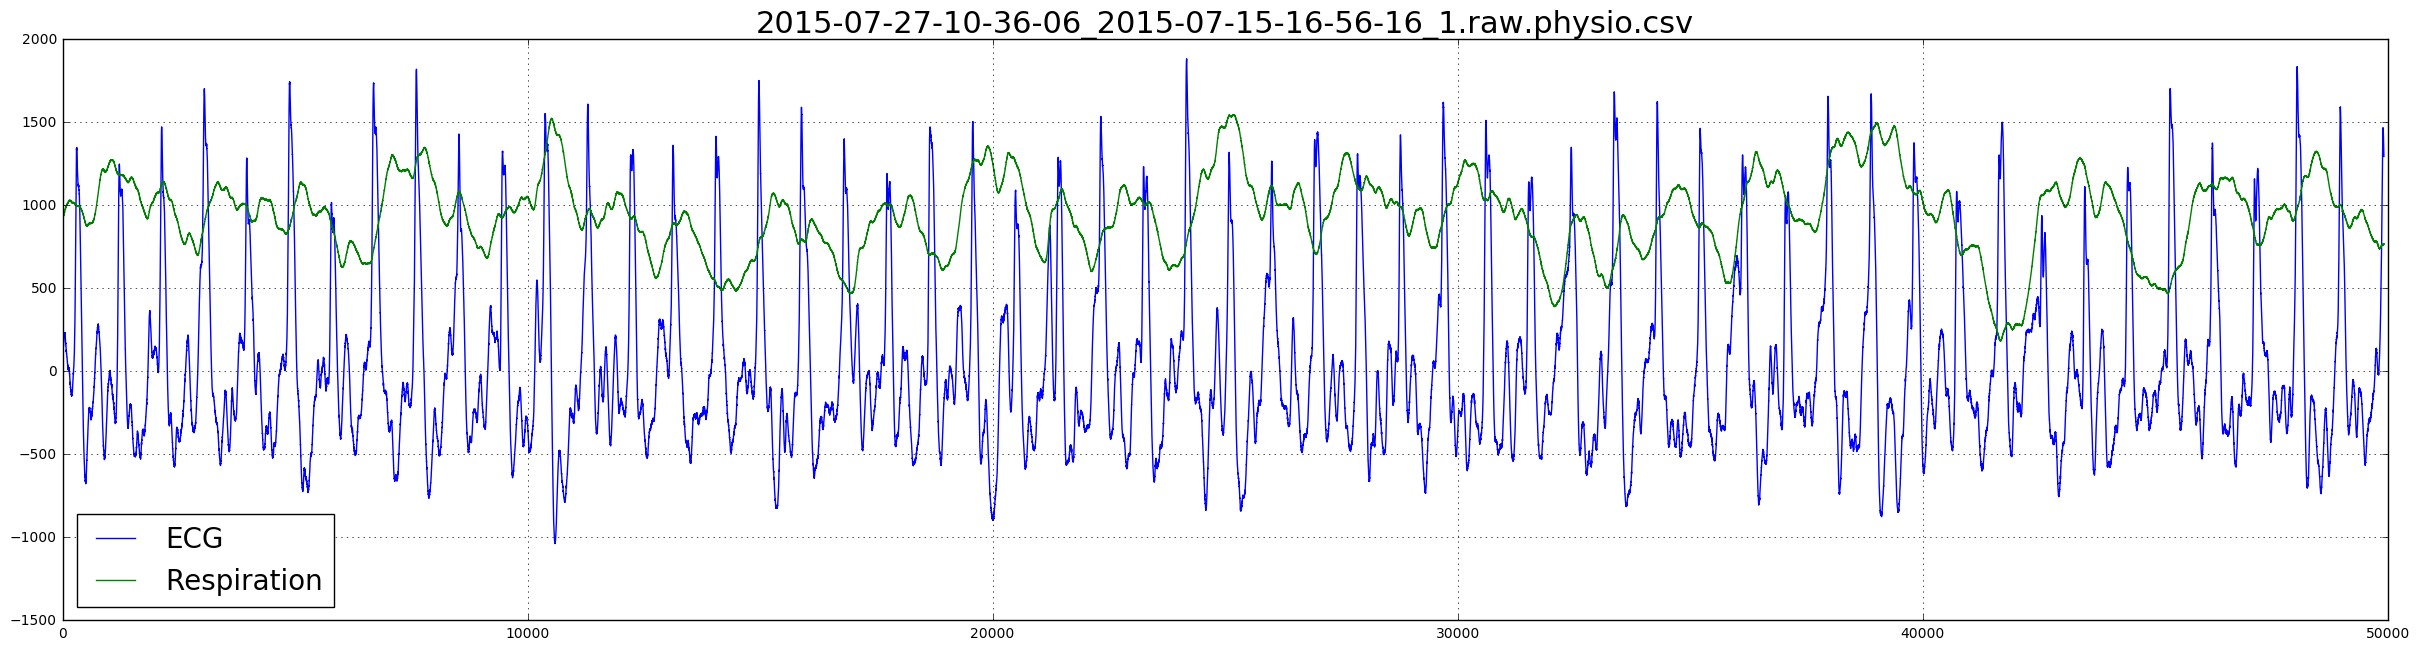

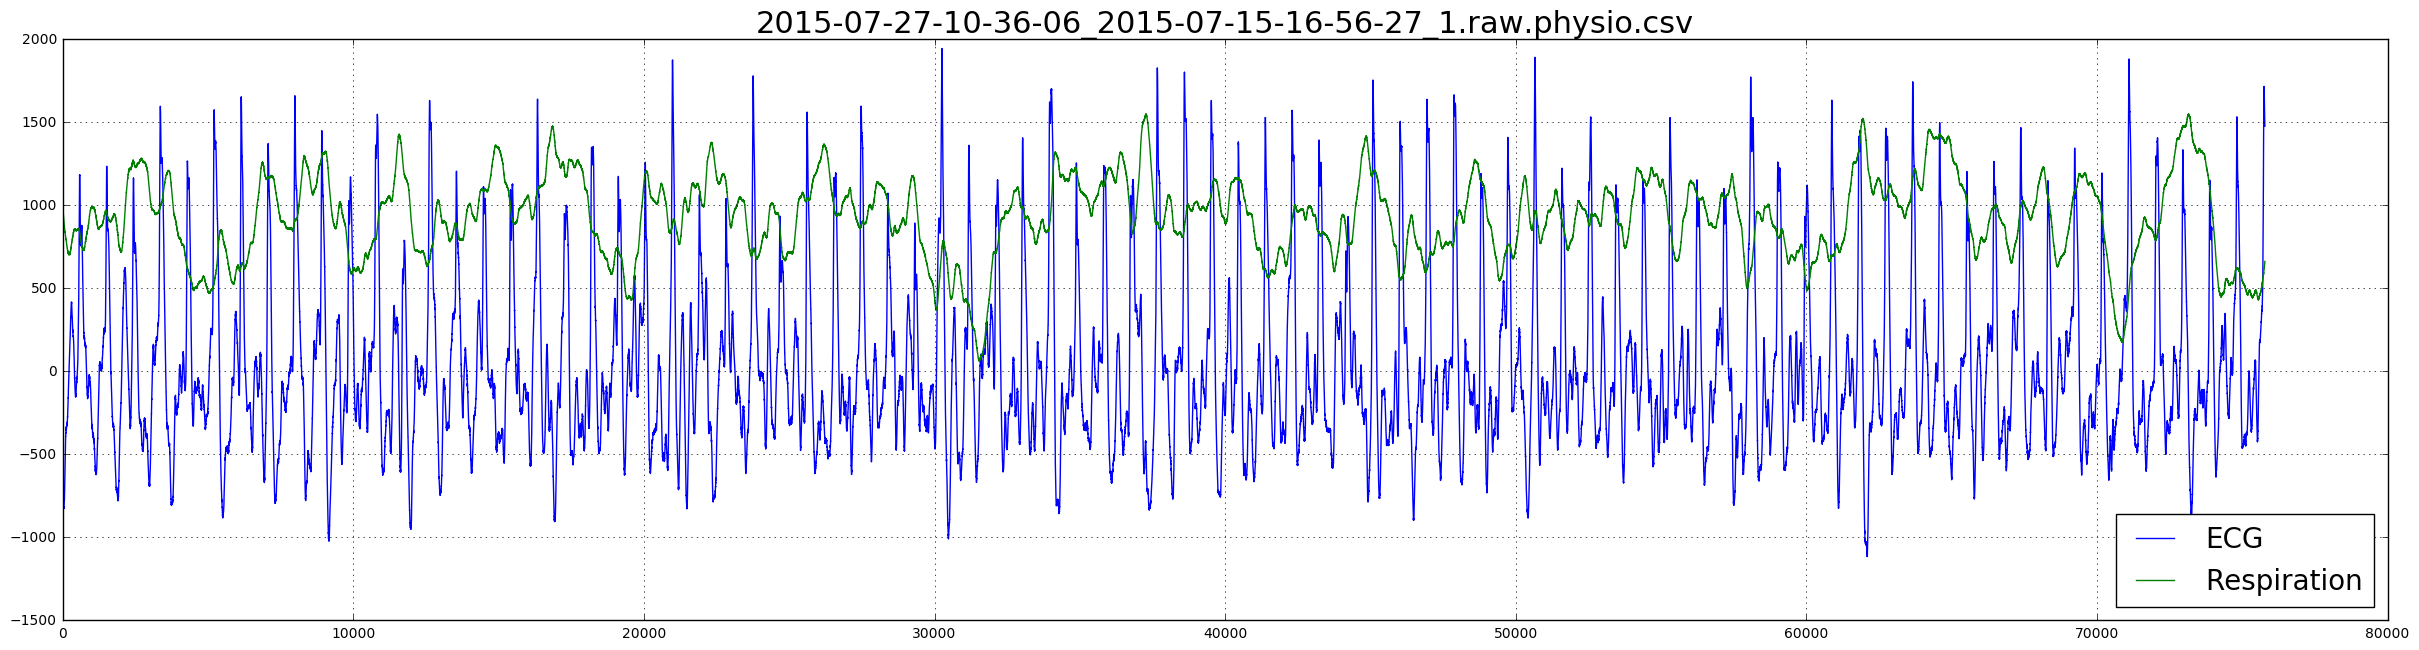

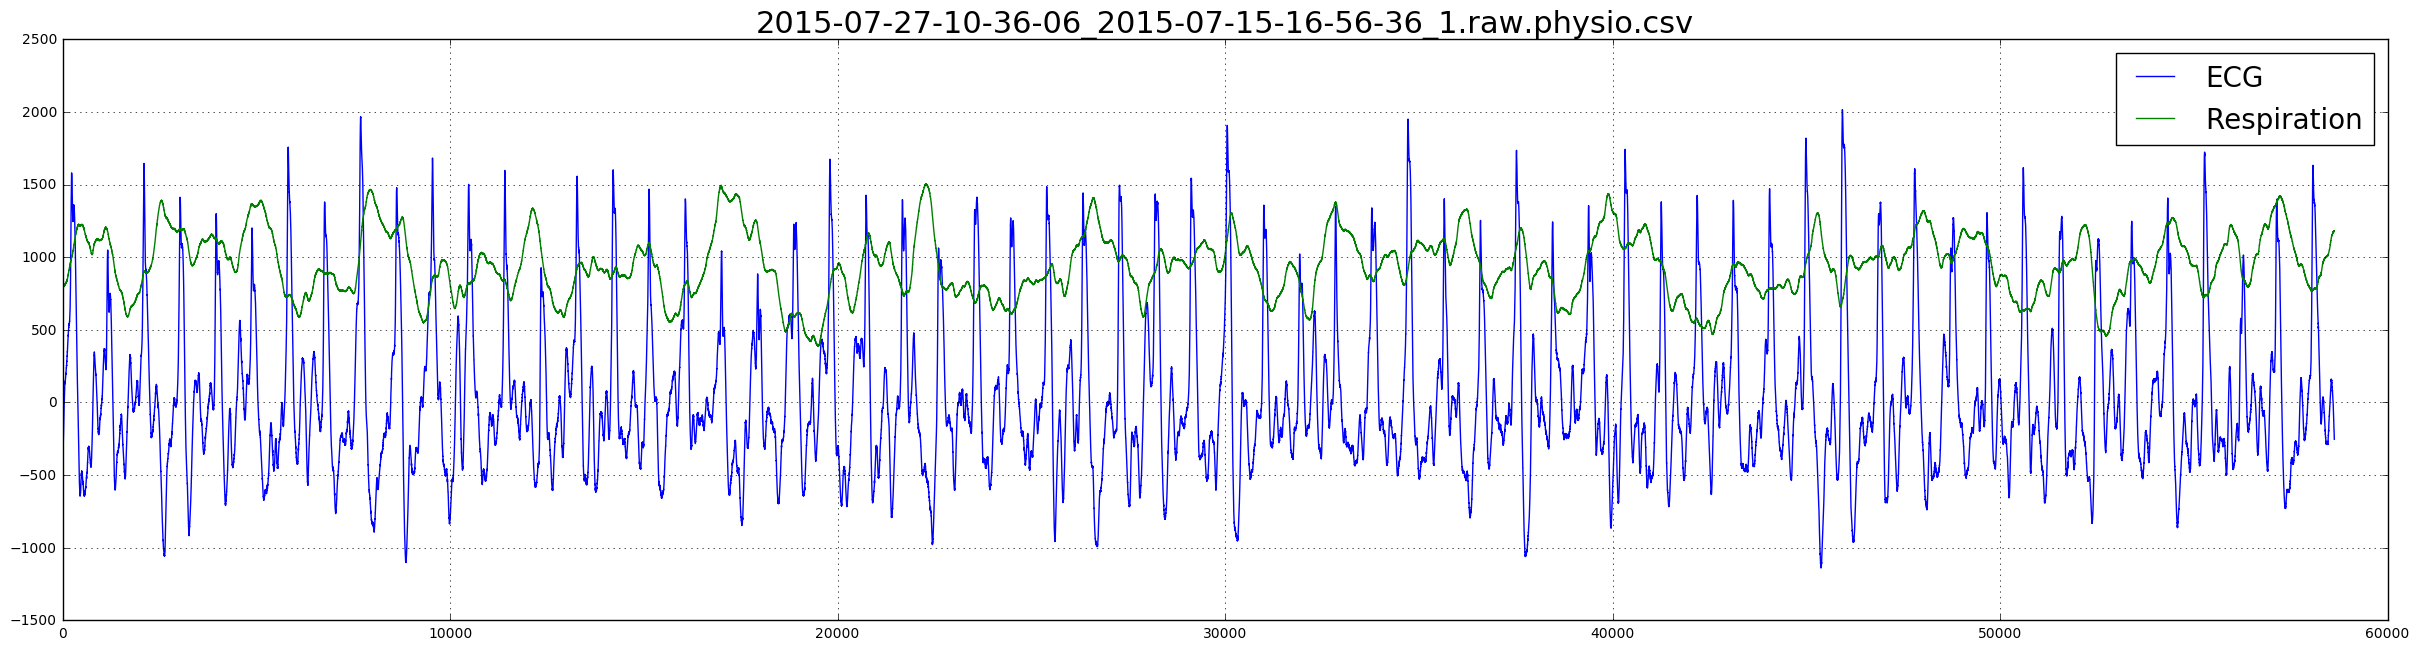

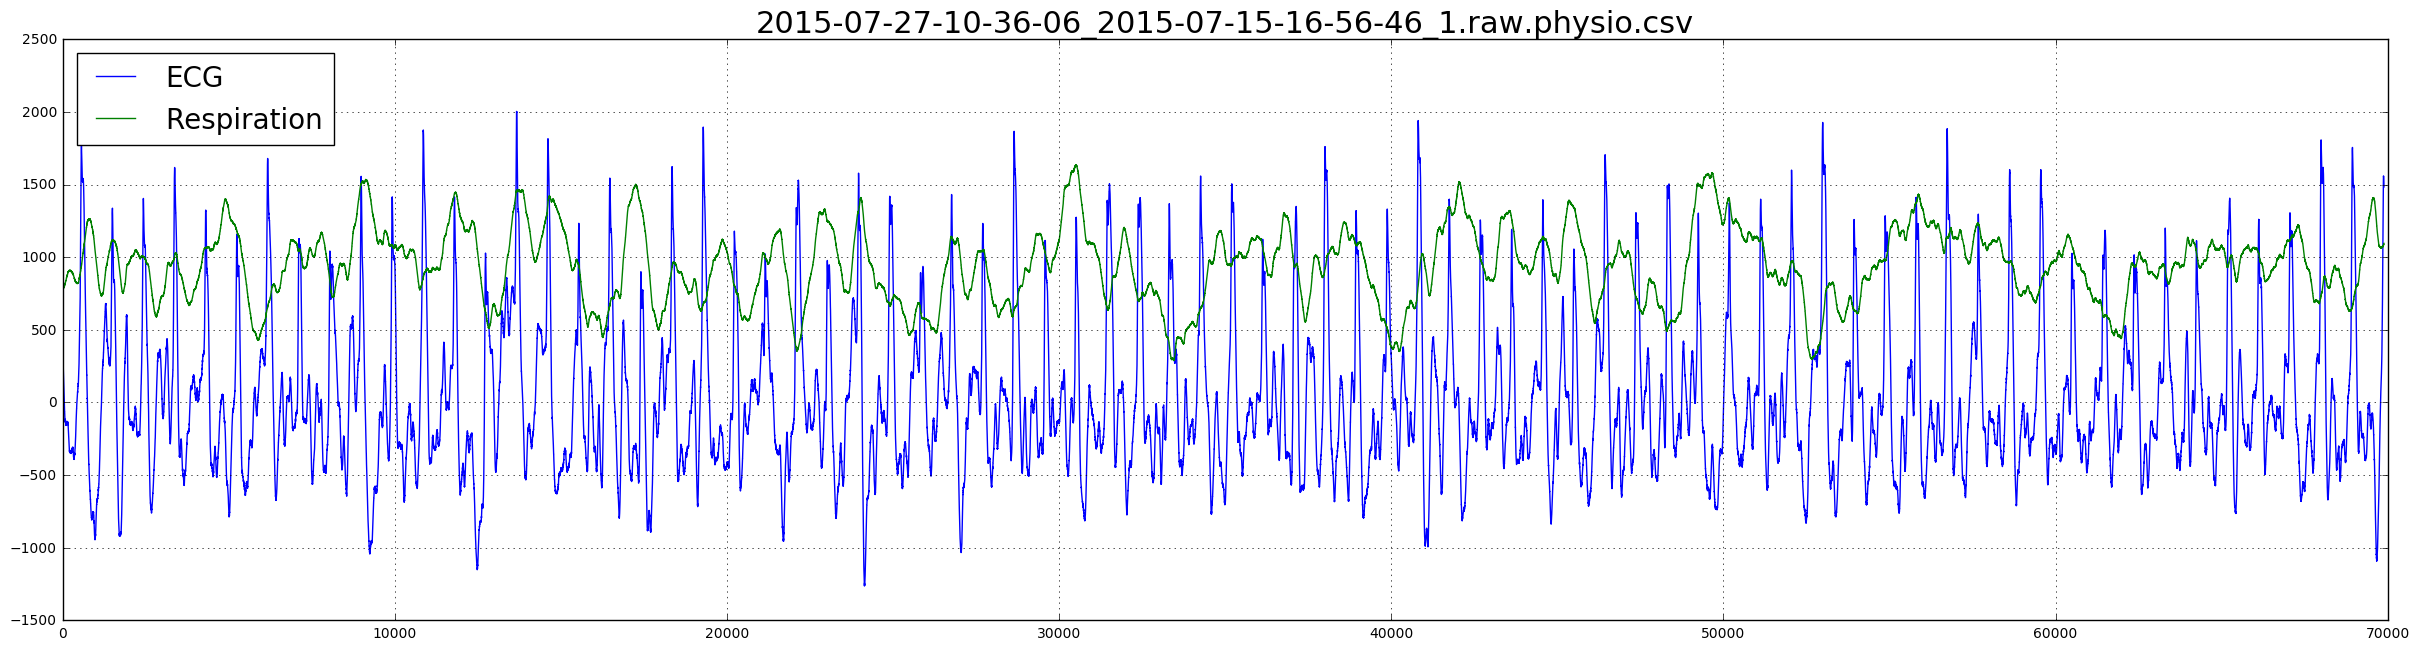

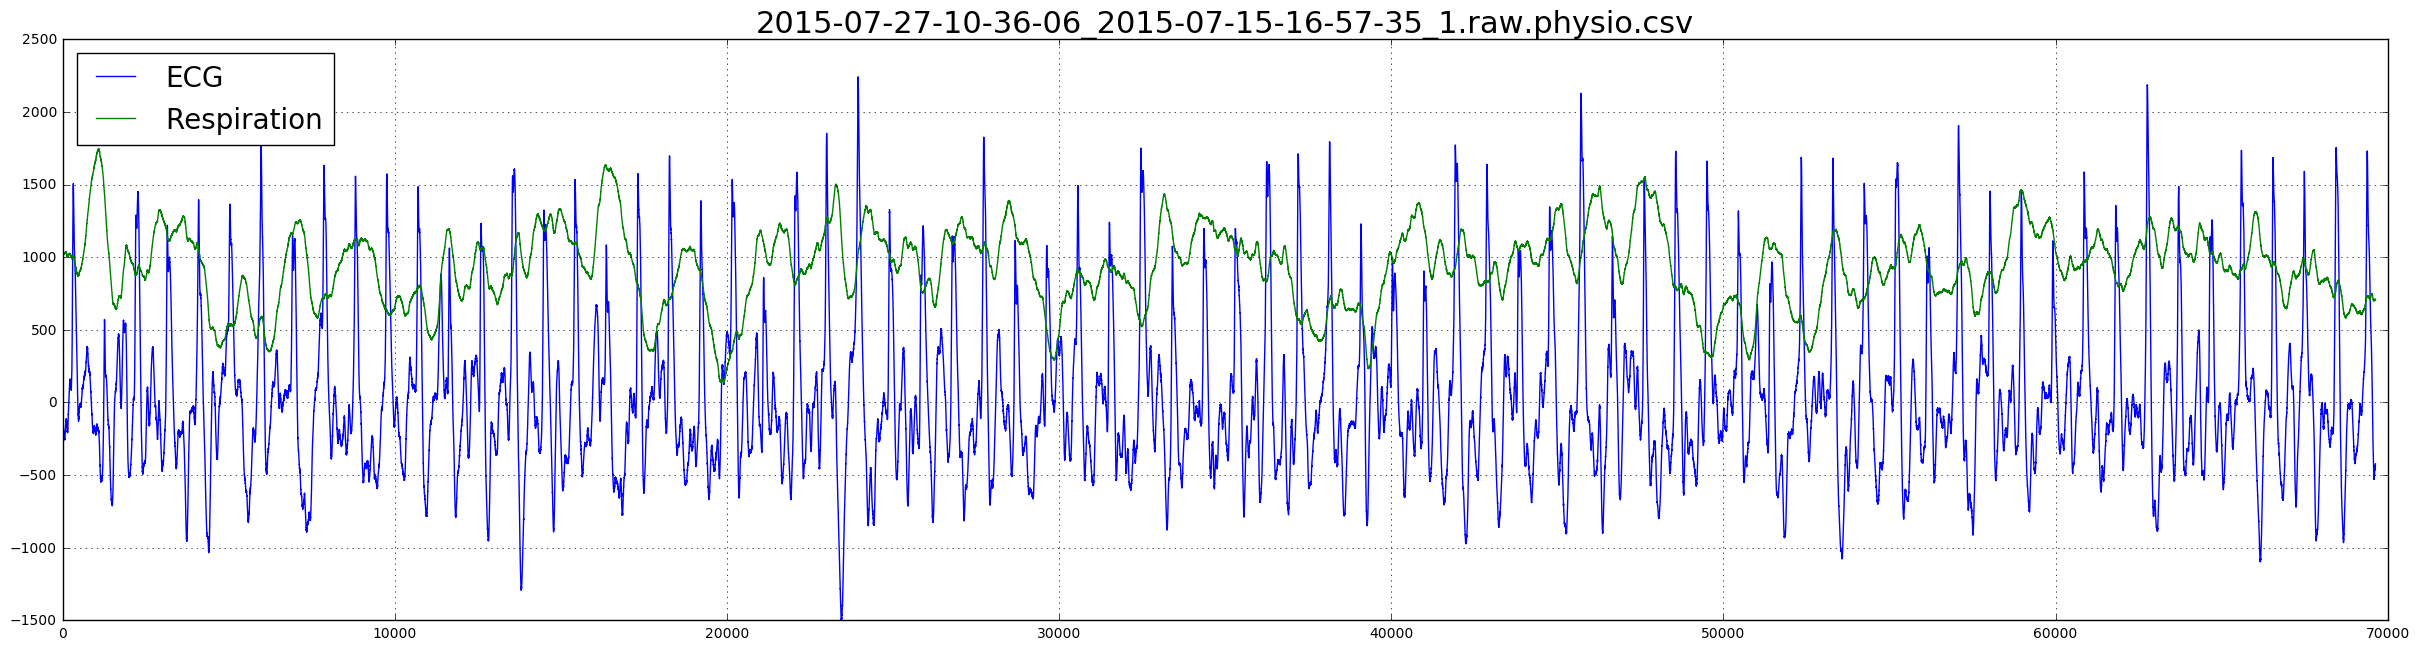

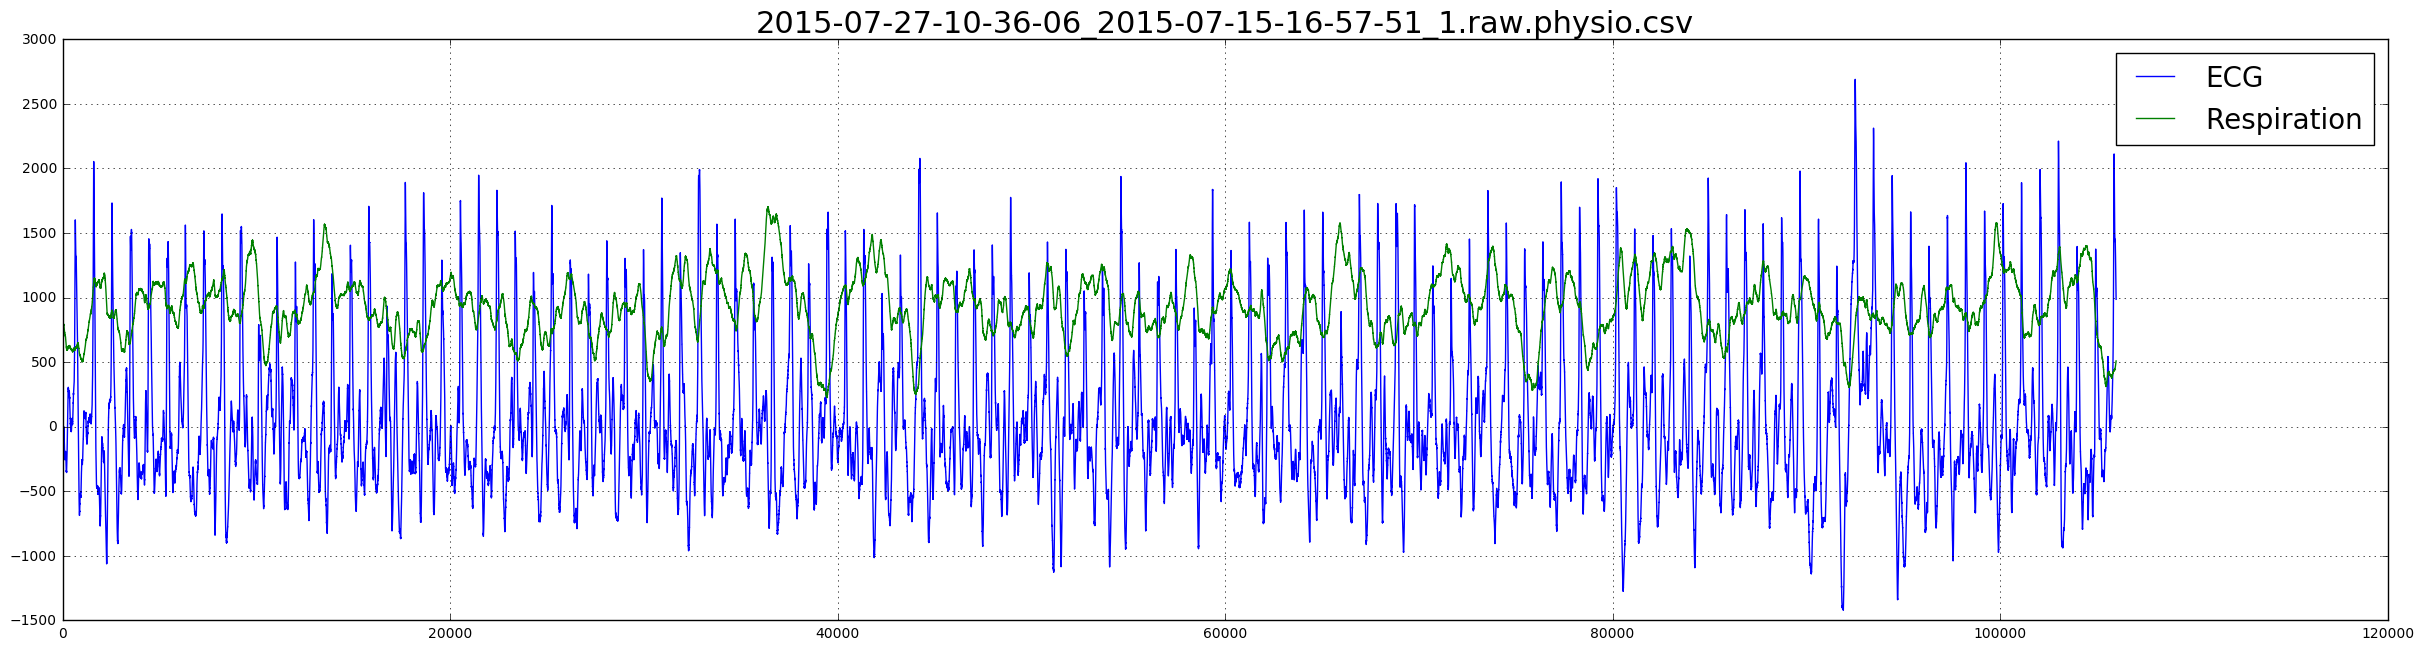

In [23]:
for fpath in glob.glob(os.path.join(outDir, '*.physio.csv')):

    df = pd.read_csv(fpath, skipinitialspace=True)
    
    plt.figure()
    plt.plot(df.ECG, label='ECG')
    plt.plot(df.Respiration, label='Respiration')
    plt.title(os.path.basename(fpath), fontsize=titlesize)
    plt.legend(fontsize=labelsize, loc='best')